<a href="https://colab.research.google.com/github/TonmoyTalukder/deep-learning-explore/blob/main/PyTorch_Explore/1_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Regression

In [27]:
# 1) Design Model (input, output size, forward pass)
# 2) Construct Loss and optimizer
# 3) Training Loop
#  - forward pass: compute prediction
#  - backward pass: gradients
#  - Update weights
#  - Iterated copuple of times

In [28]:
import torch
import torch.nn as nn # Neural Network modules
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [29]:
# 0) Prepare Data
X_numpy, y_numpy = datasets.make_regression(n_samples=100,
                                            n_features=1,
                                            noise=20,
                                            random_state=1)
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

In [30]:
# 1) model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

In [31]:
# 2) loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [32]:
# 3) Training Loop
num_epochs = 100

for epoch in range(num_epochs):
    # forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)

    # backward pass
    loss.backward()

    # update weights
    optimizer.step()

    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 10, loss = 4416.8926
epoch: 20, loss = 3295.9634
epoch: 30, loss = 2484.5186
epoch: 40, loss = 1896.5035
epoch: 50, loss = 1469.9907
epoch: 60, loss = 1160.3503
epoch: 70, loss = 935.3738
epoch: 80, loss = 771.7891
epoch: 90, loss = 652.7618
epoch: 100, loss = 566.1005


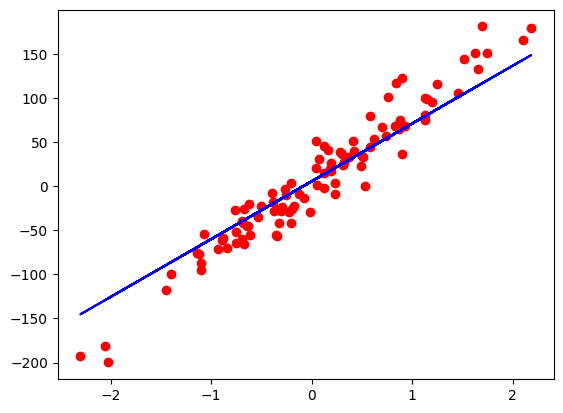

In [33]:
# Plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()

## Logistic Regression

In [14]:
# 1) Design Model (input, output size, forward pass)
# 2) Construct Loss and optimizer
# 3) Training Loop
#  - forward pass: compute prediction
#  - backward pass: gradients
#  - Update weights
#  - Iterated copuple of times

In [15]:
import torch
import torch.nn as nn # Neural Network modules
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [17]:
# 0) Prepare Data
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1234)

# scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

In [24]:
# 1) model
# f = wx + b, sigmoid at the end
class LogisticsRegression(nn.Module):
    def __init__(self, n_input_features):
        super(LogisticsRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)
    def forward(self, x):
        y_predicted = torch.sigmoid(self.linear(x))
        return y_predicted

model = LogisticsRegression(n_features)

In [25]:
# 2) loss and optimizer
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [26]:
# 3) training loop
num_epochs = 100

for epoch in range(num_epochs):
    # forward pass
    y_predicted = model(X_train)
    loss = criterion(y_predicted, y_train)

    # backward pass
    loss.backward()

    # updates
    optimizer.step()

    # zero gradients
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy = {acc:.4f}')

epoch: 10, loss = 0.5717
epoch: 20, loss = 0.4766
epoch: 30, loss = 0.4155
epoch: 40, loss = 0.3726
epoch: 50, loss = 0.3406
epoch: 60, loss = 0.3155
epoch: 70, loss = 0.2952
epoch: 80, loss = 0.2784
epoch: 90, loss = 0.2641
epoch: 100, loss = 0.2518
accuracy = 0.9123
